uploading my data set that is zipped

In [50]:
from google.colab import files
uploaded = files.upload()

Saving image.assignment.zip to image.assignment (1).zip


In [3]:
!unzip '/content/image.assignment.zip' -d '/content/image_assignment_extracted'

Archive:  /content/image.assignment.zip
   creating: /content/image_assignment_extracted/image.assignment/
   creating: /content/image_assignment_extracted/image.assignment/Test 10%/
   creating: /content/image_assignment_extracted/image.assignment/Test 10%/Anok Yai/
  inflating: /content/image_assignment_extracted/image.assignment/Test 10%/Anok Yai/ed349d3d53e230c21e61333ba1607578.jpg  
  inflating: /content/image_assignment_extracted/image.assignment/Test 10%/Anok Yai/OIP (1).jpg  
  inflating: /content/image_assignment_extracted/image.assignment/Test 10%/Anok Yai/OIP (2).jpg  
  inflating: /content/image_assignment_extracted/image.assignment/Test 10%/Anok Yai/OIP (3).jpg  
  inflating: /content/image_assignment_extracted/image.assignment/Test 10%/Anok Yai/OIP (4).jpg  
  inflating: /content/image_assignment_extracted/image.assignment/Test 10%/Anok Yai/OIP (5).jpg  
  inflating: /content/image_assignment_extracted/image.assignment/Test 10%/Anok Yai/OIP (6).jpg  
  inflating: /content

In [53]:
!pwd

/content


In [54]:
import os

print(os.listdir('/content'))
print(os.listdir('/content/image_assignment_extracted/image.assignment'))
print(os.listdir('/content/image_assignment_extracted/image.assignment/Test 10%'))
print(os.listdir('/content/image_assignment_extracted/image.assignment/Train 80%'))
print(os.listdir('/content/image_assignment_extracted/image.assignment/Validity 10%'))


['.config', 'image_assignment_extracted', 'image.assignment (1).zip', 'image.assignment.zip', 'sample_data']
['Validity 10%', 'Test 10%', 'Train 80%']
['Lois', 'Anok Yai', 'Beyonce']
['Lois', 'Anok Yai', 'Beyonce']
['Lois', 'Anok Yai', 'Beyonce']


In [55]:
import os

print('exists:', os.path.exists('/content/image_assignment_extracted/image.assignment'))
print('Train exists:', os.path.exists('/content/image_assignment_extracted/image.assignment/Train 80%'))
print('Test exists:', os.path.exists('/content/image_assignment_extracted/image.assignment/Test 10%'))
print('Validity exists:', os.path.exists('/content/image_assignment_extracted/image.assignment/Validity 10%'))
print('Anok Yai exits:', os.path.exists('/content/image_assignment_extracted/image.assignment/Test 10%/Anok Yai'))



exists: True
Train exists: True
Test exists: True
Validity exists: True
Anok Yai exits: True


In [57]:
import os

Train_dir = '/content/image_assignment_extracted/image.assignment/Train 80%'
Validity_dir = '/content/image_assignment_extracted/image.assignment/Validity 10%'
Test_dir = '/content/image_assignment_extracted/image.assignment/Test 10%'

Train_Anok_Yai_dir = '/content/image_assignment_extracted/image.assignment/Train 80%/Anok Yai'
Train_Beyonce_dir = '/content/image_assignment_extracted/image.assignment/Train 80%/Beyonce'
Train_Lois_dir =  '/content/image_assignment_extracted/image.assignment/Train 80%/Lois'

Validity_Anok_Yai_dir = '/content/image_assignment_extracted/image.assignment/Validity 10%/Anok Yai'
Validity_Beyonce_dir = '/content/image_assignment_extracted/image.assignment/Validity 10%/Beyonce'
Validity_Lois_dir = '/content/image_assignment_extracted/image.assignment/Validity 10%/Lois'

Test_Anok_Yai_dir = '/content/image_assignment_extracted/image.assignment/Test 10%/Anok Yai'
Test_Beyonce_dir = '/content/image_assignment_extracted/image.assignment/Test 10%/Beyonce'
Test_Lois_dir = '/content/image_assignment_extracted/image.assignment/Test 10%/Lois'

directories = {
    "Train Anok Yai": Train_Anok_Yai_dir,
    "Train Beyonce" :Train_Beyonce_dir,
    "Train Lois": Train_Lois_dir,
    "Validity Anok Yai": Validity_Anok_Yai_dir,
    "Validity Beyonce": Validity_Beyonce_dir,
    "Validity Lois": Validity_Lois_dir,
    "Test Anok Yai": Test_Anok_Yai_dir,
    "Test Beyonce": Test_Beyonce_dir,
    "Test Lois": Test_Lois_dir,
}

for name, dir_path in directories.items():
  if os.path.exists(dir_path):
    num_items = len(os.listdir(dir_path))
    print(f"Total items in {name} directory: {num_items}")
  else:
    print(f"Directory not found: {name}")


Total items in Train Anok Yai directory: 80
Total items in Train Beyonce directory: 80
Total items in Train Lois directory: 80
Total items in Validity Anok Yai directory: 10
Total items in Validity Beyonce directory: 10
Total items in Validity Lois directory: 10
Total items in Test Anok Yai directory: 10
Total items in Test Beyonce directory: 10
Total items in Test Lois directory: 10


In [58]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)


In [59]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_1 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 82944)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │          82,945 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 471,361 (1.80 MB)

 Trainable params: 471,361 (1.80 MB)

 Non-trainable params: 0 (0.00 B)

In [60]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [61]:
from tensorflow.keras.utils import image_dataset_from_directory

Train_dataset = image_dataset_from_directory(
    Train_dir,
    image_size=(180, 180),
    batch_size=32)
Validity_dataset = image_dataset_from_directory(
    Validity_dir,
    image_size=(180, 180),
    batch_size=32)
Test_dataset = image_dataset_from_directory(
    Test_dir,
    image_size=(180, 180),
    batch_size=32)



Found 187 files belonging to 3 classes.
Found 26 files belonging to 3 classes.
Found 21 files belonging to 3 classes.


In [62]:
batch_id=1
for data_batch, labels_batch in Train_dataset:
  print('batch_id', batch_id)
  print('data batch shape:',data_batch.shape)
  print('labels batch shape:', labels_batch.shape)
  batch_id+=1


batch_id 1
data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)
batch_id 2
data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)
batch_id 3
data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)
batch_id 4
data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)
batch_id 5
data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)
batch_id 6
data batch shape: (27, 180, 180, 3)
labels batch shape: (27,)


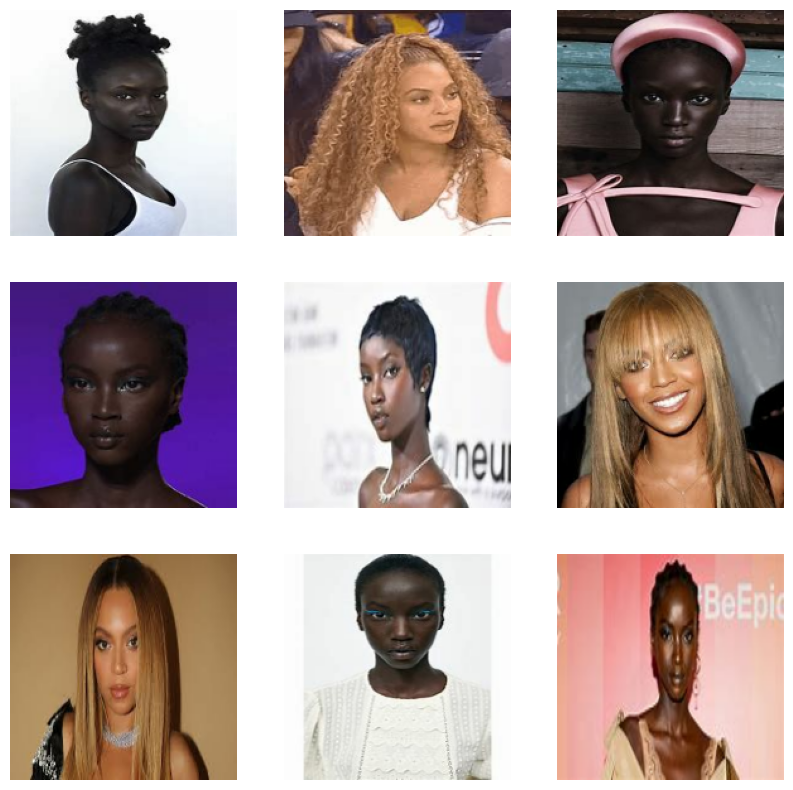

In [63]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
i=0
for images, _ in Train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.axis("off")
    i+1


In [64]:
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory

# Debug Dataset Loading
try:
    Train_dataset = image_dataset_from_directory(
        Train_dir,
        image_size=(180, 180),
        batch_size=32
    )
    print("Training dataset loaded successfully.")
except Exception as e:
    print(f"Error loading training dataset: {e}")

try:
    Validity_dataset = image_dataset_from_directory(
        Validity_dir,
        image_size=(180, 180),
        batch_size=32
    )
    print("Validation dataset loaded successfully.")
except Exception as e:
    print(f"Error loading validation dataset: {e}")

try:
    Test_dataset = image_dataset_from_directory(
        Test_dir,
        image_size=(180, 180),
        batch_size=32
    )
    print("Test dataset loaded successfully.")
except Exception as e:
    print(f"Error loading test dataset: {e}")


Found 187 files belonging to 3 classes.
Training dataset loaded successfully.
Found 26 files belonging to 3 classes.
Validation dataset loaded successfully.
Found 21 files belonging to 3 classes.
Test dataset loaded successfully.


In [65]:
print("Train_dataset type:", type(Train_dataset))
print("Validity_dataset type:", type(Validity_dataset))


Train_dataset type: <class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>
Validity_dataset type: <class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>


In [66]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="covnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")

]

history = model.fit(
    Train_dataset,
    epochs=30,
    validation_data=Validity_dataset,
    callbacks=callbacks)



Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 29s 5s/step - accuracy: 0.3760 - loss: 1.6010 - val_accuracy: 0.3846 - val_loss: 0.5479
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 32s 3s/step - accuracy: 0.3697 - loss: 0.5929 - val_accuracy: 0.3846 - val_loss: 0.0519
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.3691 - loss: 1.1715 - val_accuracy: 0.3846 - val_loss: 0.4457
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.3867 - loss: 0.6014 - val_accuracy: 0.3846 - val_loss: 0.0642
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 0.5220 - loss: 0.5444 - val_accuracy: 0.4615 - val_loss: 1.5871
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 0.4891 - loss: 0.7664 - val_accuracy: 0.4615 - val_loss: 0.2984
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 0.5664 - loss: 0.2838 - val_accuracy: 0.4615 - val_loss: -0.6051
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 23s 3s/step - accuracy: 0.6482 - loss: -0.6664 - val_accuracy: 0.6154 - val_loss: 0.2435
Epoch 

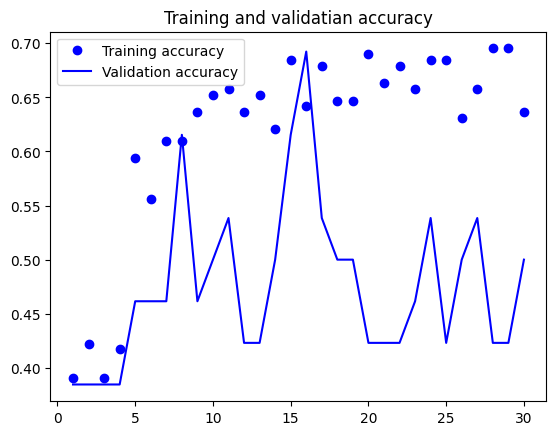

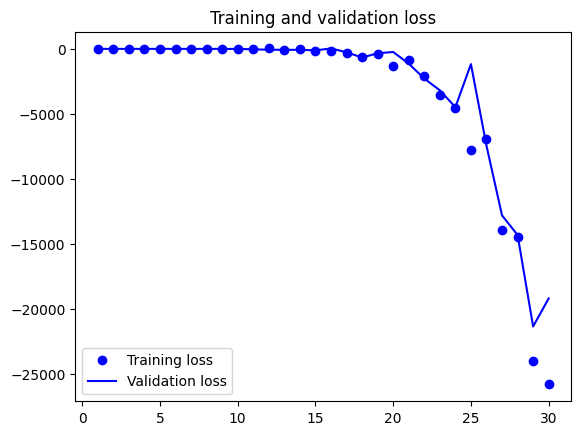

In [67]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) +1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validatian accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [68]:
Test_model = keras.models.load_model("covnet_from_scratch.keras")
Test_loss, Test_acc = Test_model.evaluate(Test_dataset)
print(f"Test accuracy: {Test_acc:.3f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5714 - loss: 26389.9785
Test accuracy: 0.571
